# Import libraries and generate data

In [105]:
import os
import sys 

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings
import warnings
warnings.filterwarnings('ignore')
# Add parent directory to sys.path
sys.path.append(os.getcwd() + '/..')

from src.Utils.dgp import dgp_rnd_assignment

df = dgp_rnd_assignment().generate_data()
df.head()

,Group,Arm,Gender,Age,Income
0,control,NaN,0,29.0,568.44
1,control,NaN,1,32.0,596.45
2,treatment,arm 3,0,29.0,380.86
3,control,NaN,0,25.0,476.38
4,treatment,arm 4,1,32.0,628.28


# Pieplot

<AxesSubplot:ylabel='Group'>

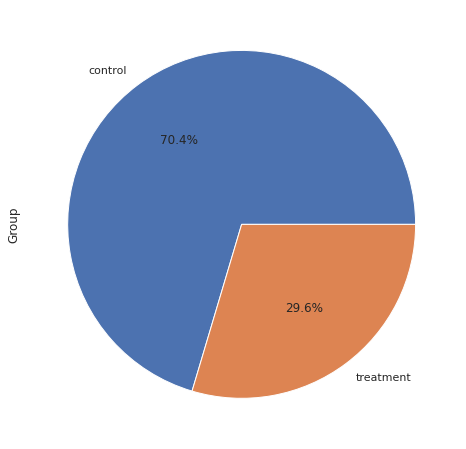

In [115]:
df['Group'].value_counts().plot.pie(autopct="%.1f%%")

# Pieplot + histogram

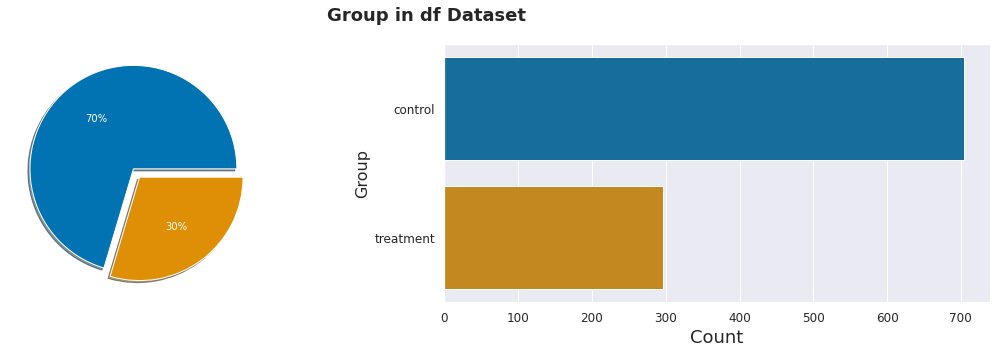

In [111]:
def plot_target_feature(df_train, target_col, figsize=(16,5), palette='colorblind', name='Train'):
    
    df_train = df_train.fillna('Nan')
    
    fig, ax = plt.subplots(1, 2, figsize = figsize)
    ax = ax.flatten()

    # Pie chart
    ax[0].pie(
        df_train[target_col].value_counts(), 
        shadow=True, 
        explode=[0.05] * len(df_train[target_col].unique()),
        autopct='%1.f%%',
        textprops={'size': 10, 'color': 'white'},
        colors=sns.color_palette(palette, len(df_train[target_col].unique()))
    )

    # Bar plot
    sns.countplot(
        data=df_train, 
        y=target_col, 
        ax=ax[1], 
        palette=palette
    )
    ax[1].yaxis.label.set_size(16)
    plt.yticks(fontsize=12)
    ax[1].set_xlabel('Count', fontsize=18)
    plt.xticks(fontsize=12)

    fig.suptitle(f'{target_col} in {name} Dataset', fontsize=18, fontweight='bold')
    plt.tight_layout()

    # Show the plot
    plt.show()
    
plot_target_feature(df, 'Group', figsize=(16,5), palette='colorblind', name='df')

# Boxplot

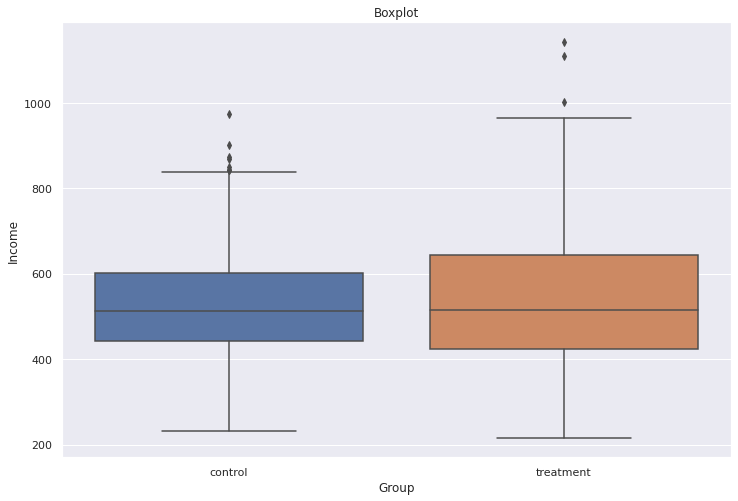

In [99]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=df, x='Group', y='Income');
plt.title("Boxplot");

# Multiple boxplot

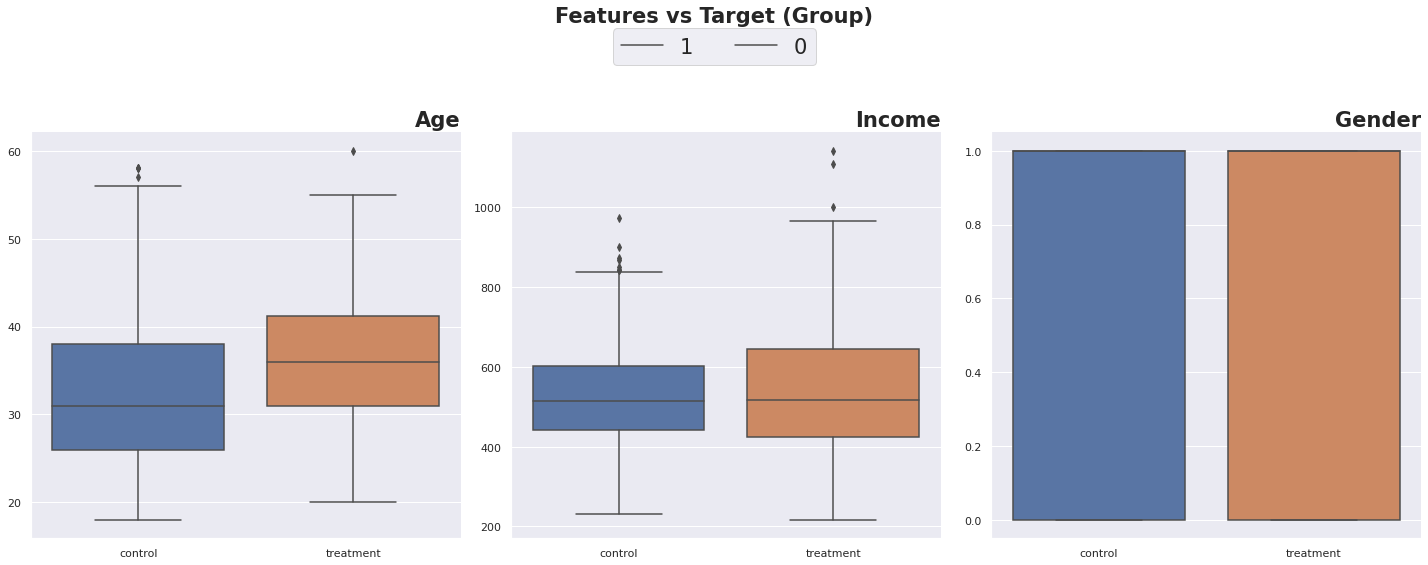

In [102]:
num_cols = ['Age', 'Income', 'Gender']
figsize = (20, 8)

def plot_target_boxplot(df, df_cols, n_rows, n_cols, target):
    fig = plt.figure(figsize=figsize)
    
    for idx, col in enumerate(df_cols):
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        sns.boxplot(x=target, y=col, data=df)

        ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
        ax.set_xlabel(''); ax.spines['right'].set_visible(False)
        ax.set_title(f'{col}', loc='right', weight='bold', fontsize=21)

    
    fig.suptitle(f'Features vs Target ({target})\n\n\n', ha='center',  fontweight='bold', fontsize=21)
    fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
    plt.tight_layout()
    plt.show()
    
plot_target_boxplot(df, num_cols, n_rows=1, n_cols=3, target='Group') 

# Violin plot, multiple groups

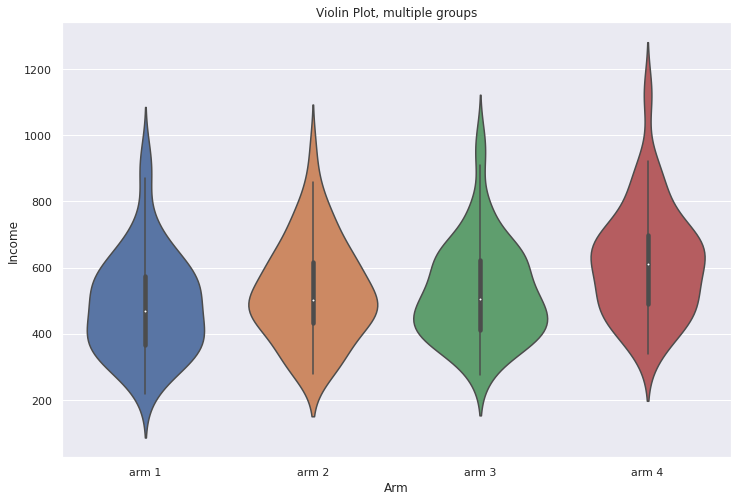

In [4]:
sns.violinplot(x='Arm', y='Income', data=df.sort_values('Arm'));
plt.title("Violin Plot, multiple groups");

# Multiple violine plot

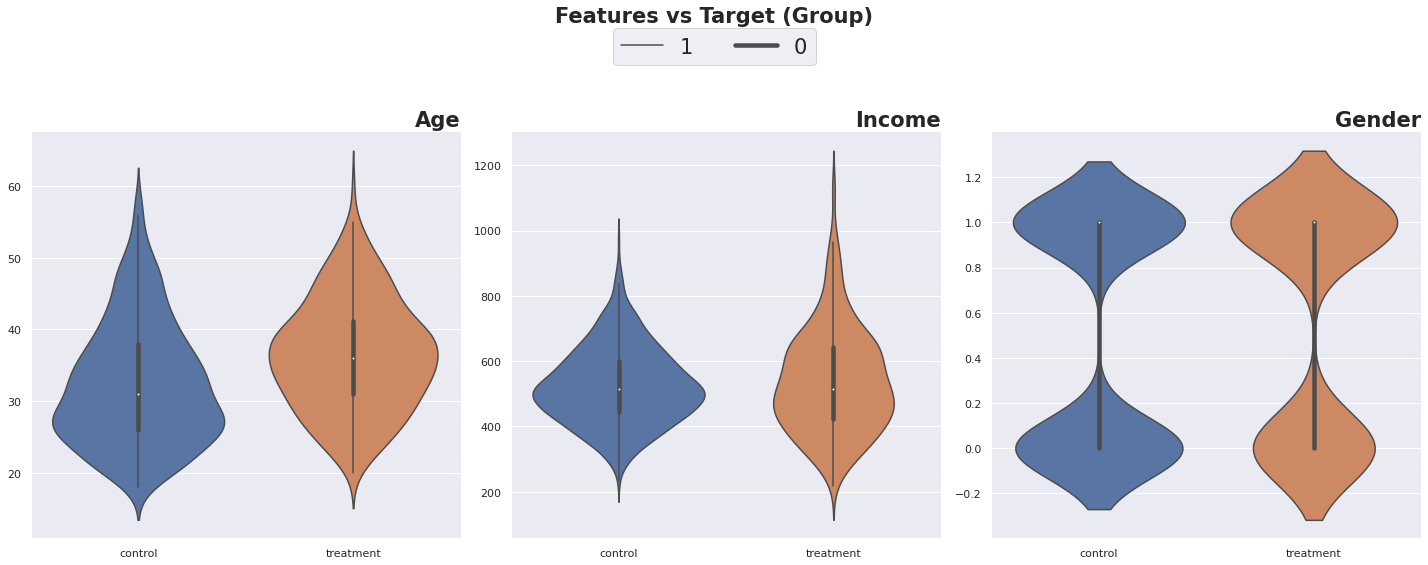

In [101]:
num_cols = ['Age', 'Income', 'Gender']
figsize = (20, 8)

def plot_target_violine(df, df_cols, n_rows, n_cols, target):
    fig = plt.figure(figsize=figsize)
    
    for idx, col in enumerate(df_cols):
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        sns.violinplot(x=target, y=col, data=df)

        ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
        ax.set_xlabel(''); ax.spines['right'].set_visible(False)
        ax.set_title(f'{col}', loc='right', weight='bold', fontsize=21)

    
    fig.suptitle(f'Features vs Target ({target})\n\n\n', ha='center',  fontweight='bold', fontsize=21)
    fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
    plt.tight_layout()
    plt.show()
    
plot_target_violine(df, num_cols, n_rows=1, n_cols=3, target='Group') 

# Histogram

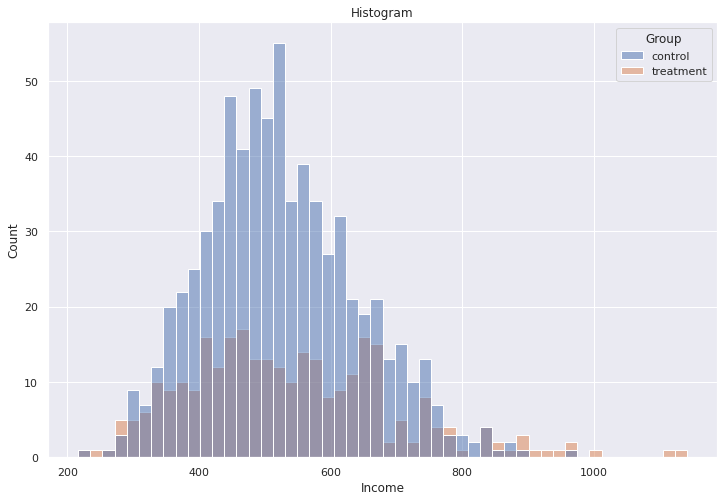

In [5]:
sns.histplot(data=df, x='Income', hue='Group', bins=50);
plt.title("Histogram");

# Density histogram

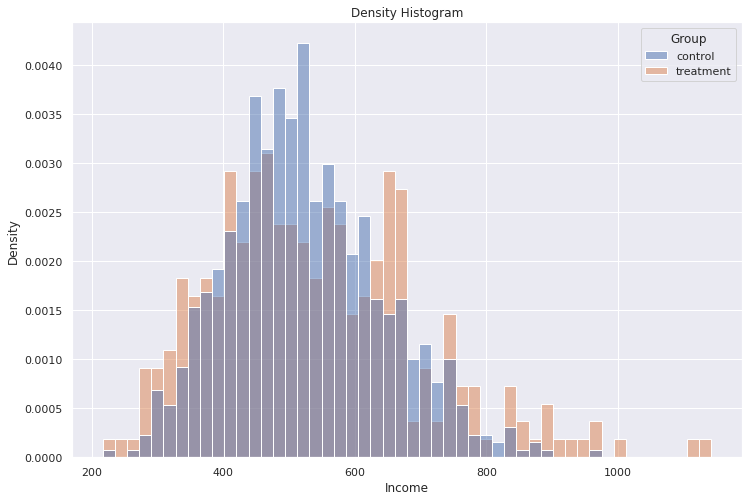

In [6]:
sns.histplot(data=df, x='Income', hue='Group', bins=50, stat='density', common_norm=False);
plt.title("Density Histogram");

# KDE histogram

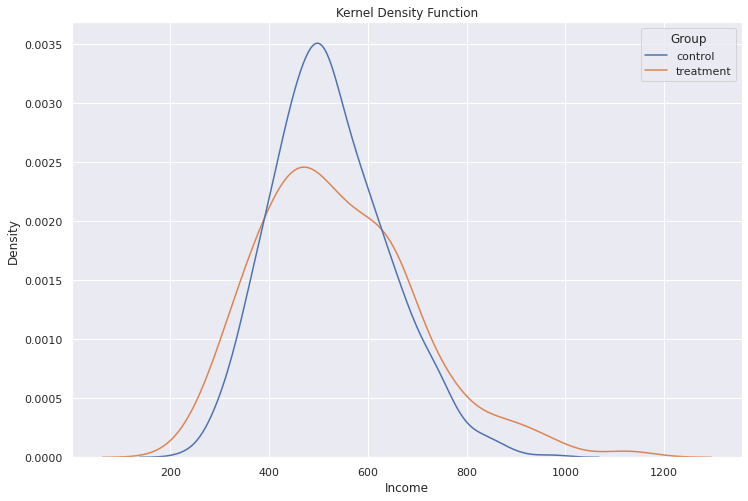

In [7]:
sns.kdeplot(x='Income', data=df, hue='Group', common_norm=False);
plt.title("Kernel Density Function");

# Cumulative distribution function

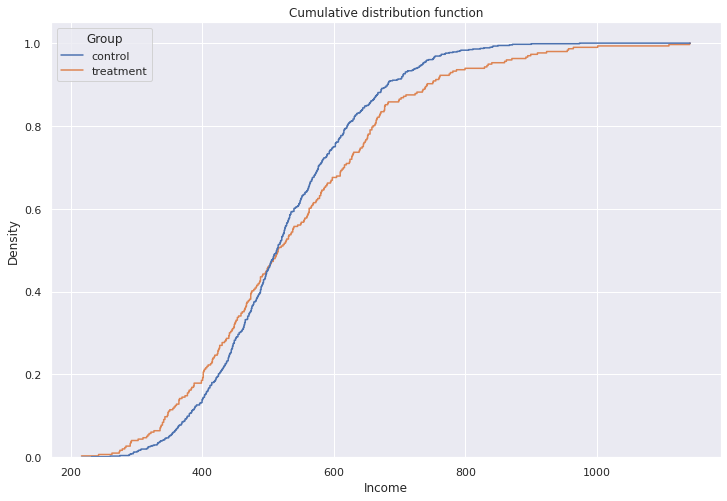

In [8]:
sns.histplot(x='Income', data=df, hue='Group', bins=len(df), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False);
plt.title("Cumulative distribution function");

# Q-Q plot

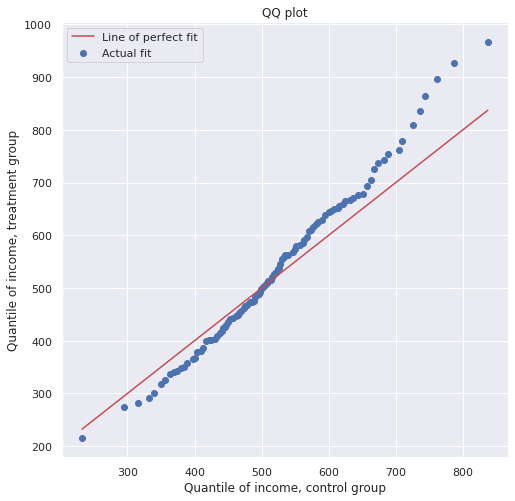

In [9]:
# create data for Q-Q plot
income = df['Income'].values
income_t = df.loc[df.Group=='treatment', 'Income'].values
income_c = df.loc[df.Group=='control', 'Income'].values

df_pct = pd.DataFrame()
df_pct['q_treatment'] = np.percentile(income_t, range(100))
df_pct['q_control'] = np.percentile(income_c, range(100))

del income

# show Q-Q plot
plt.figure(figsize=(8, 8))
plt.scatter(x='q_control', y='q_treatment', data=df_pct, label='Actual fit');
sns.lineplot(x='q_control', y='q_control', data=df_pct, color='r', label='Line of perfect fit');
plt.xlabel('Quantile of income, control group')
plt.ylabel('Quantile of income, treatment group')
plt.legend()
plt.title("QQ plot");

# Ridgeline Plot

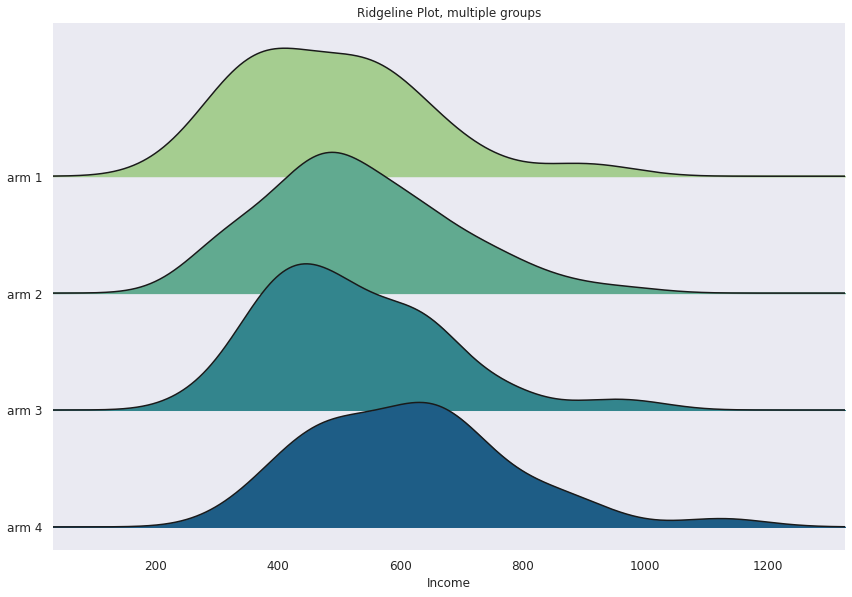

In [10]:
from joypy import joyplot

joyplot(df, by='Arm', column='Income', colormap=sns.color_palette("crest", as_cmap=True));
plt.xlabel('Income');
plt.title("Ridgeline Plot, multiple groups");

# Feature/target distribution difference

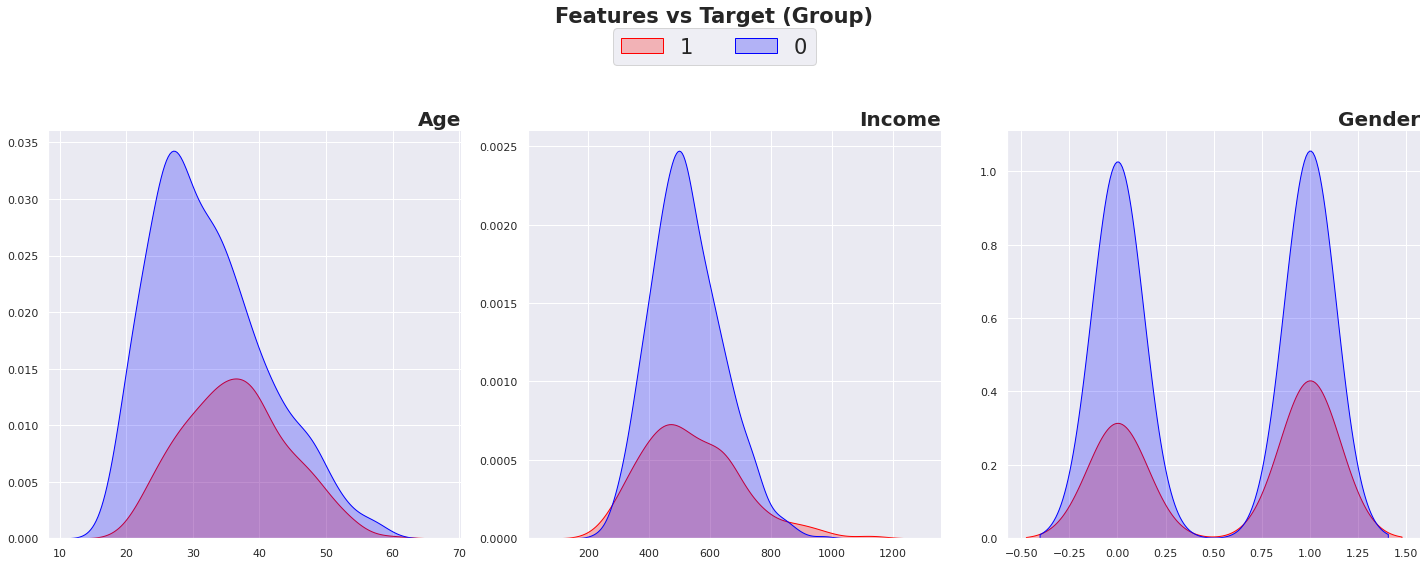

In [98]:
num_cols = ['Age', 'Income', 'Gender']
figsize=(20, 8)

def plot_target_diff(df, df_cols, n_rows, n_cols, target):
    fig = plt.figure(figsize=figsize)
    for idx, col in enumerate(df_cols):
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        sns.kdeplot(
            data=df, hue=target, fill=True,
            x=col, palette=['blue', 'red'], legend=False
        )

        ax.set_ylabel(''); ax.spines['top'].set_visible(False), 
        ax.set_xlabel(''); ax.spines['right'].set_visible(False)
        ax.set_title(f'{col}', loc='right', 
                     weight='bold', fontsize=20)

    
    fig.suptitle(f'Features vs Target ({target})\n\n\n', ha='center',  fontweight='bold', fontsize=21)
    fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
    plt.tight_layout()
    plt.show()
    
plot_target_diff(df, num_cols, n_rows=1, n_cols=3, target='Group')    

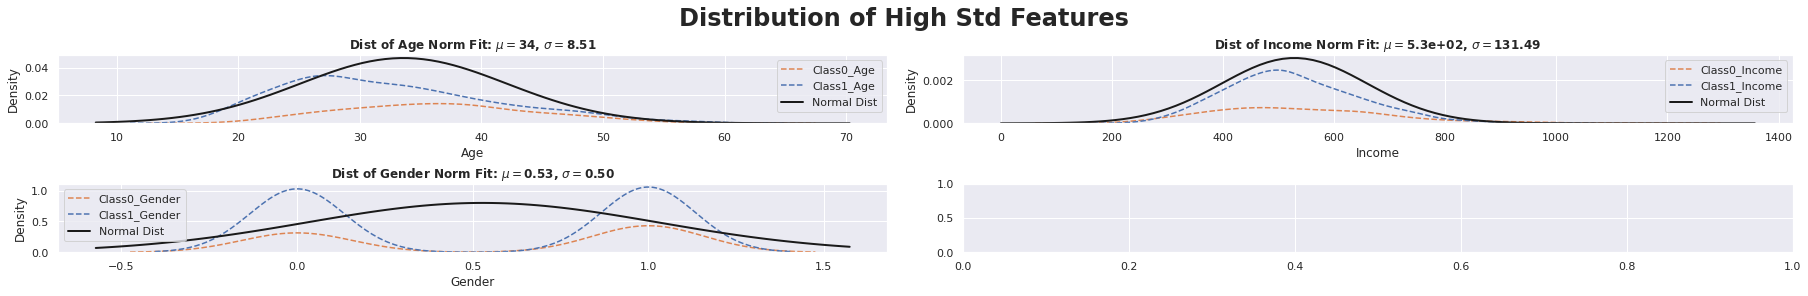

In [25]:
from scipy.stats import norm, skew, kurtosis

def feat_dist(df, cols, rows=2, columns=2, title=None, figsize=(30, 25)):
    
    fig, axes = plt.subplots(rows, columns, figsize=figsize, constrained_layout=True)
    axes = axes.flatten()

    for i, j in zip(cols, axes):
        sns.kdeplot(data=df, x=i, ax=j, hue='Group', linewidth=1.5, linestyle='--')
        
        (mu, sigma) = norm.fit(df[i])
        
        xmin, xmax = j.get_xlim()[0], j.get_xlim()[1]
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, sigma)
        j.plot(x, p, 'k', linewidth=2)
        
        j.set_title('Dist of {0} Norm Fit: $\mu=${1:.2g}, $\sigma=${2:.2f}'.format(i, mu, sigma), weight='bold')
        j.legend(labels=[f'Class0_{i}', f'Class1_{i}', 'Normal Dist'])
        fig.suptitle(f'{title}', fontsize=24, weight='bold')
        
feat_dist(df, ['Age', 'Income', 'Gender'], rows=2, columns=2, title='Distribution of High Std Features', figsize=(25, 4))

# Correlation between features and target

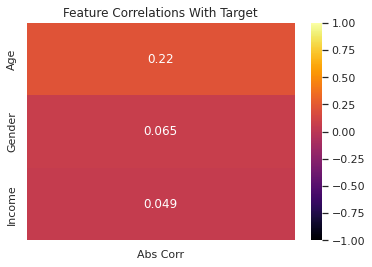

In [69]:
num_cols = ['Age', 'Income', 'Gender']

correlations = df.loc[:,num_cols].corrwith(df['Group'].map({'control': 0, 'treatment': 1})).to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.01], cmap='inferno', annot=True, vmin=-1, vmax=1, ax=ax)
plt.title('Feature Correlations With Target')
plt.show()

# Correlation between features

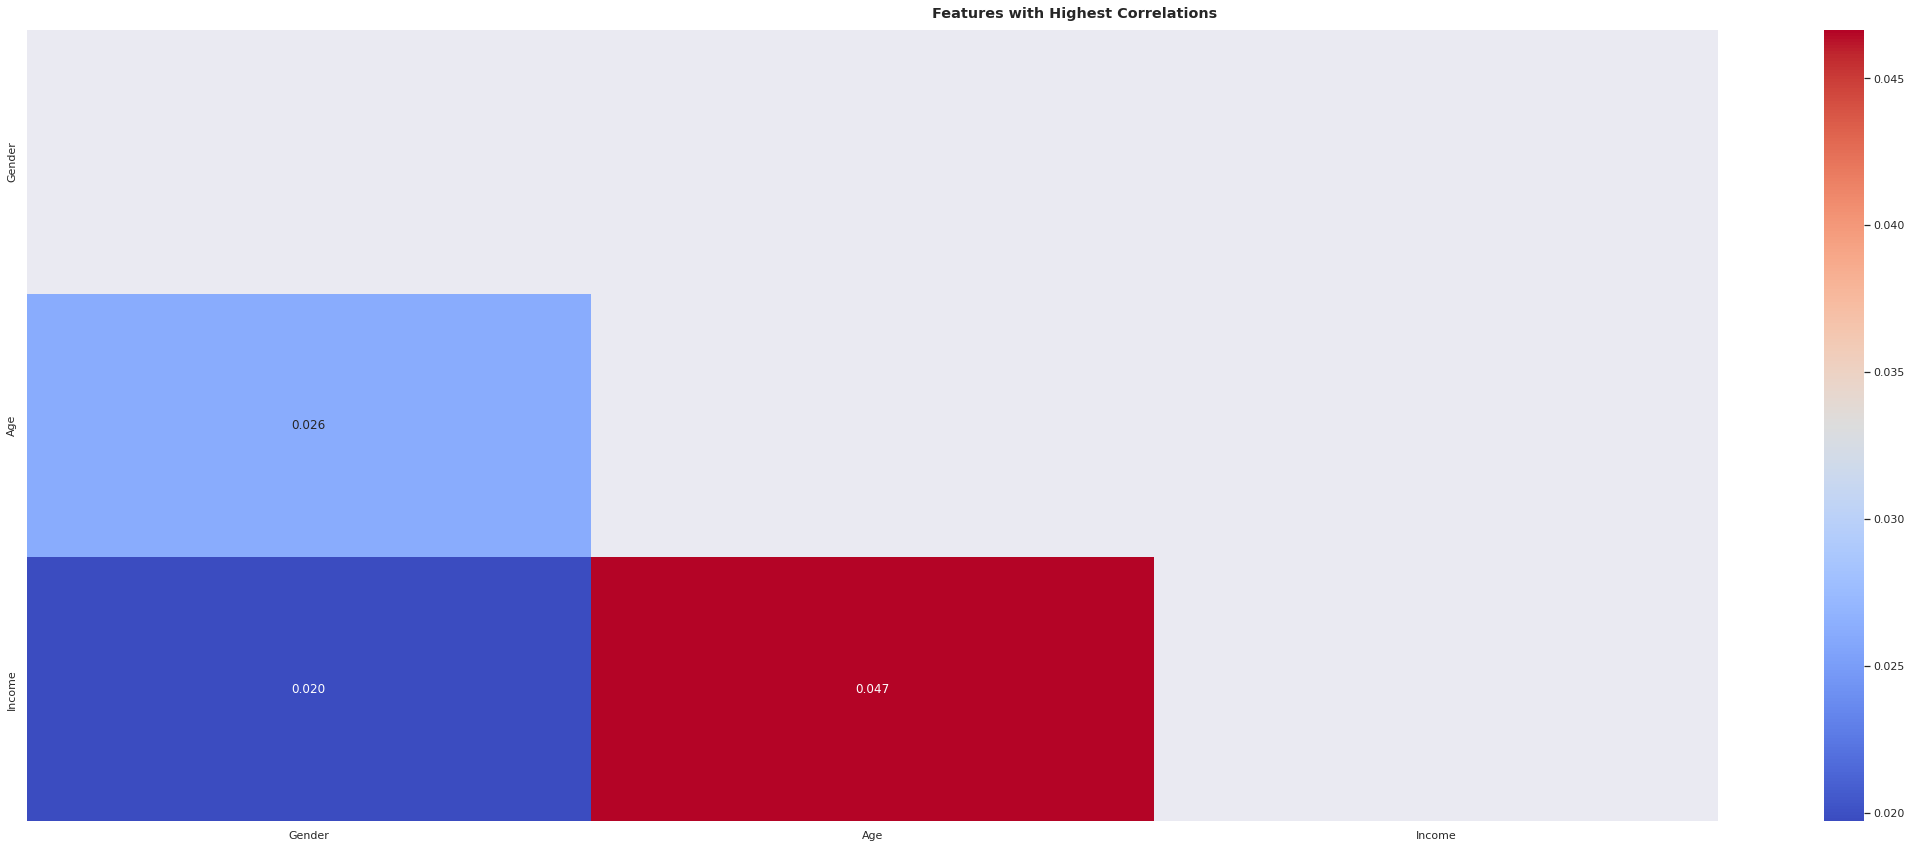

In [70]:
correlations = df.loc[:,num_cols].corr().abs().unstack().sort_values(kind="quicksort",ascending=False).reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']] #preventing 1.0 corr
corr_max=correlations.level_0.head(150).tolist()
corr_max=list(set(corr_max)) #removing duplicates

corr_min=correlations.level_0.tail(34).tolist()
corr_min=list(set(corr_min)) #removing duplicates


correlation_train = df.loc[:,corr_max].corr()
mask = np.triu(correlation_train.corr())

plt.figure(figsize=(30, 12))
sns.heatmap(correlation_train,
            mask=mask,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            linewidths=0.00,
            cbar=True)


plt.suptitle('Features with Highest Correlations',  weight='bold')
plt.tight_layout()

# Correlation Heatmap

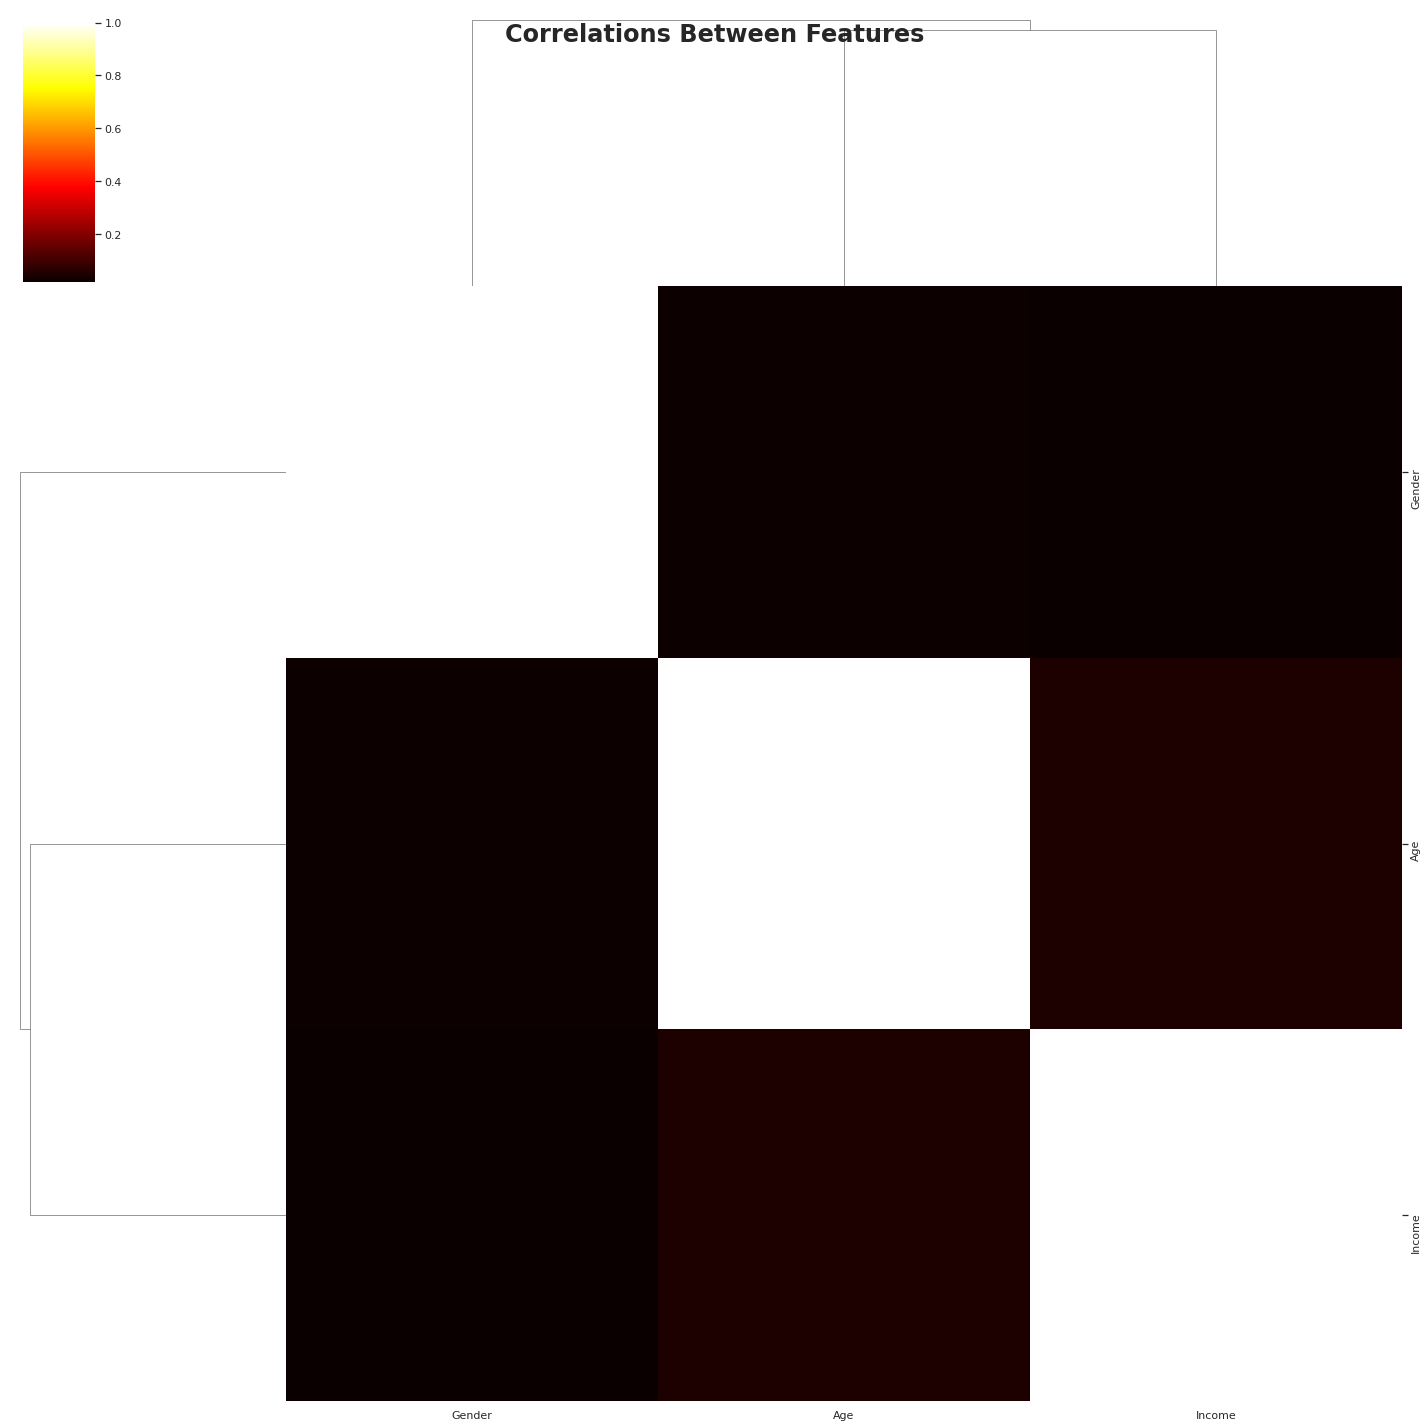

In [71]:
corr = df.loc[:, num_cols].corr()
sns.clustermap(corr, metric="correlation", cmap="hot", figsize=(20, 20))
plt.suptitle('Correlations Between Features', fontsize=24, weight='bold')
plt.show()

# Plot correlated features + regression

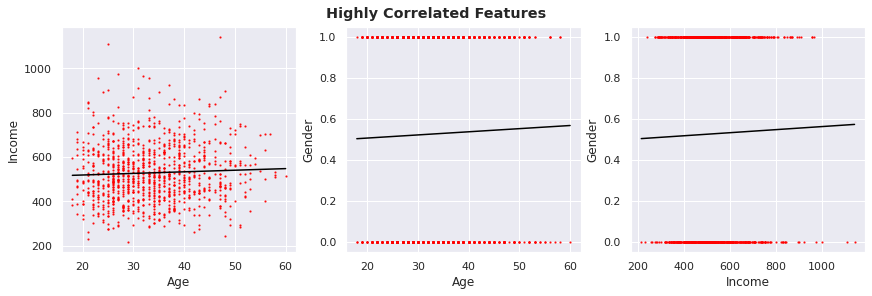

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)
axes = axes.flatten()

# for i, j in zip(cols, axes):
i = 0
for row in range(0,6,2):
    a = correlations.reset_index(drop=True).loc[row, ['level_0', 'level_1']][0]
    b = correlations.reset_index(drop=True).loc[row, ['level_0', 'level_1']][1]    
   
    sns.regplot(data=df, x=a, y=b, ci=False, ax=axes[i], order=1, scatter_kws={'color':'red', 's':1.5}, line_kws={'color':'black', 'linewidth':1.5})
    i+=1
    
plt.suptitle('Highly Correlated Features',  weight='bold')
plt.show()